In [49]:
def solve_cudnn_error():
    import tensorflow as tf
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            # Currently, memory growth needs to be the same across GPUs
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
            logical_gpus = tf.config.experimental.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
        except RuntimeError as e:
            # Memory growth must be set before GPUs have been initialized# Memory growth must be set before GPUs have been initialized
            print(e)
solve_cudnn_error()

1 Physical GPUs, 1 Logical GPUs


In [50]:
# Import the libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt  # for 畫圖用
import pandas as pd# load and evaluate a saved model
from numpy import loadtxt
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector,GRU, Input, ConvLSTM2D, Bidirectional,BatchNormalization
from tensorflow.keras import Input
#from tensorflow.keras.layers.normalization import BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,Nadam

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
import math
import json
from IPython.core.pylabtools import figsize
figsize(10,10) 
FDC_Data = pd.read_csv(r'E:\FDC\dataset\data2021.csv', sep=',')
FDC_Data.dtypes






Serial_number                                                                   int64
Latch:_LA_269353054_DevicePositionXOnLFAtP1;_CEID15651.4                        int64
Latch:_LA_269353055_DevicePositionYOnLFAtP1;_CEID15651.5                        int64
Latch:_LA_269353094_DispenseProcessAvePress;_CEID15651.7                        int64
Latch:_LA_269353095_DispenseProcessAveZHeight;_CEID15651.8                    float64
Latch:_LA_251920580_DispenserPressure_ECRO;_CEID15651.9                         int64
Latch:_LA_269353094_DispenseProcessAvePress;_CEID15651.7.1                      int64
Latch:_LA_269353095_DispenseProcessAveZHeight;_CEID15651.8.1                  float64
Latch:_LA_251920580_DispenserPressure_ECRO;_CEID15651.9.1                       int64
Latch:_LA_251920465_DispenseHeightToStrip_ECRO;_CEID15651.10                  float64
Latch:_LA_269353092_DispenseCurrentBondPosition;_CEID15651.6                    int64
Sig:_DispenseProcess_AvePress_(post_Step)             

In [51]:
num = 0
for i in FDC_Data.columns:
    print("{} : {}".format(num,i))
    num = num+1
   

0 : Serial_number
1 : Latch:_LA_269353054_DevicePositionXOnLFAtP1;_CEID15651.4
2 : Latch:_LA_269353055_DevicePositionYOnLFAtP1;_CEID15651.5
3 : Latch:_LA_269353094_DispenseProcessAvePress;_CEID15651.7
4 : Latch:_LA_269353095_DispenseProcessAveZHeight;_CEID15651.8
5 : Latch:_LA_251920580_DispenserPressure_ECRO;_CEID15651.9
6 : Latch:_LA_269353094_DispenseProcessAvePress;_CEID15651.7.1
7 : Latch:_LA_269353095_DispenseProcessAveZHeight;_CEID15651.8.1
8 : Latch:_LA_251920580_DispenserPressure_ECRO;_CEID15651.9.1
9 : Latch:_LA_251920465_DispenseHeightToStrip_ECRO;_CEID15651.10
10 : Latch:_LA_269353092_DispenseCurrentBondPosition;_CEID15651.6
11 : Sig:_DispenseProcess_AvePress_(post_Step)
12 : Sig:_DispenseProcess_AveZHeight_(post_Step)
13 : Sig:_DispenseProcess_AvePressDifference_(post_Step)
14 : Sig:_DispenseProcess_AveZHeightDifference_(post_Step)
15 : Sig:_DispenseProcess_AveZHeight_ProductionOnly_(post_Step)
16 : Sig:_DispenseProcess_AvePressDifference_ProductionOnly_(post_Step)
17 : Si

In [191]:
Values = FDC_Data.values
def draw_trend(groups):
    figsize(15,10) 
    i=1
    cols = groups
    for group in groups:
        plt.subplot(len(cols), 1, i)
        plt.plot(Values[:122, group],linewidth=3)
        plt.title(str(group)+" : "+FDC_Data.columns[group], y=1, loc='right',fontsize=20)
        i += 1
    plt.tight_layout()
    plt.show()


In [183]:
def show_corr(group):
    plt.matshow(FDC_Data.iloc[:,group].corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
    plt.title('Spearman', size=15)
    plt.xticks(range(len(group)),labels=map(str,group))
    plt.yticks(range(len(group)),labels=map(str,group))
    plt.colorbar()
    plt.show()

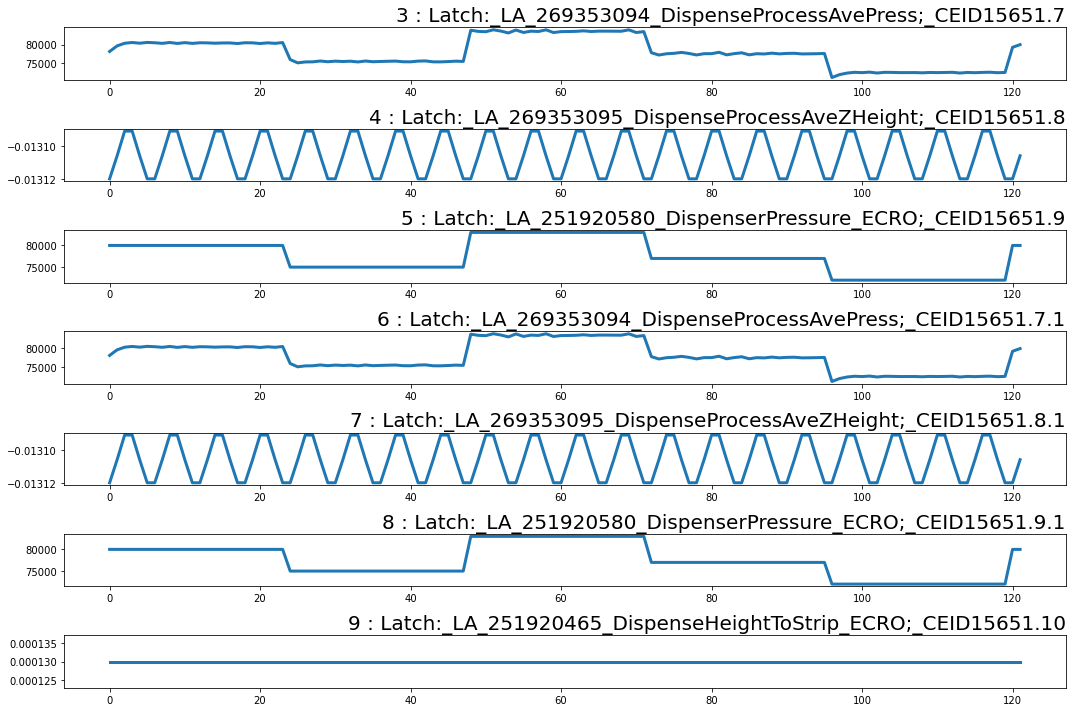

In [192]:
draw_trend([3,4,5,6,7,8,9])

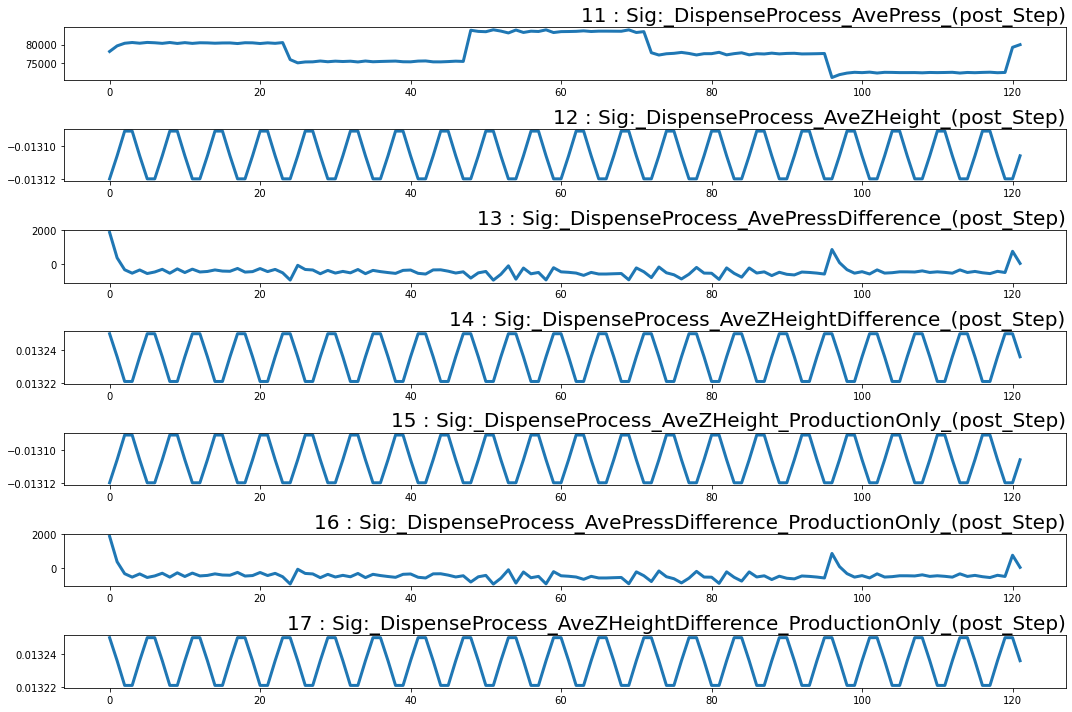

In [195]:
draw_trend([11,12,13,14,15,16,17])

C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\envs\rtx3070\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


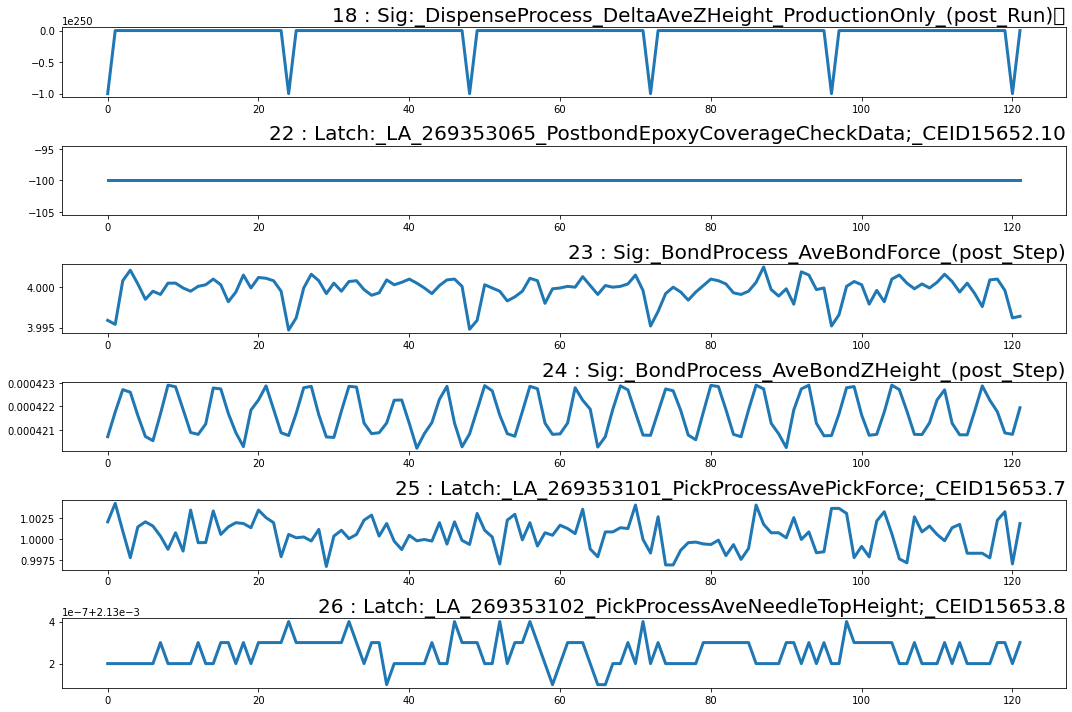

In [194]:
draw_trend([18,22,23,24,25,26])

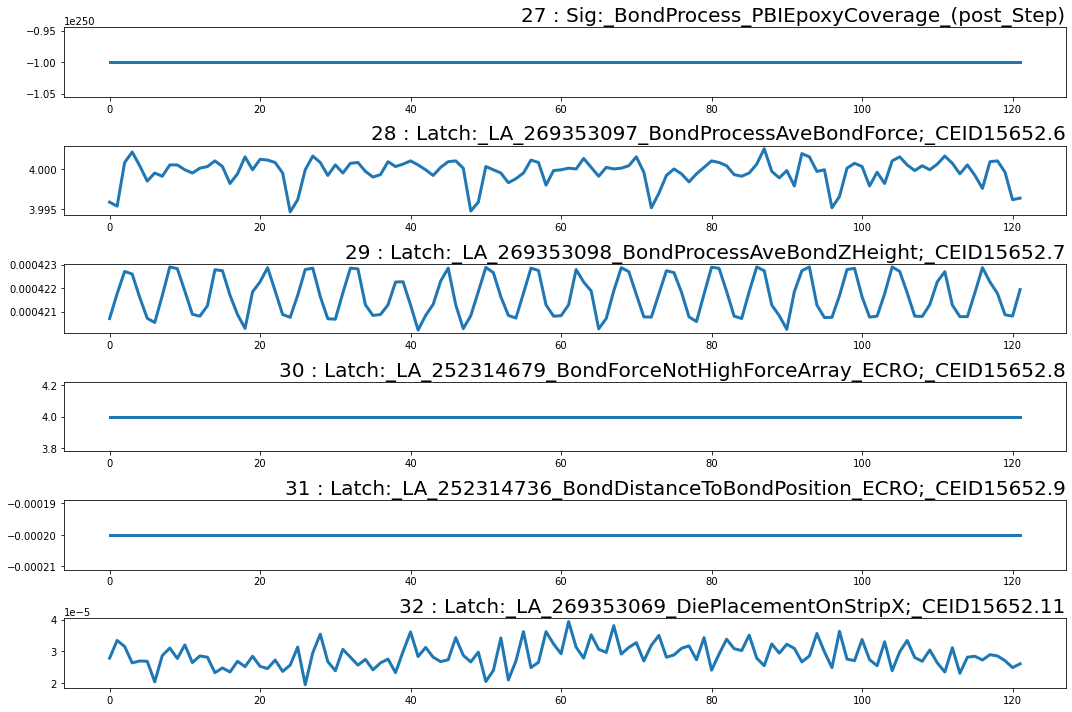

In [196]:
draw_trend(range(27,33,1))

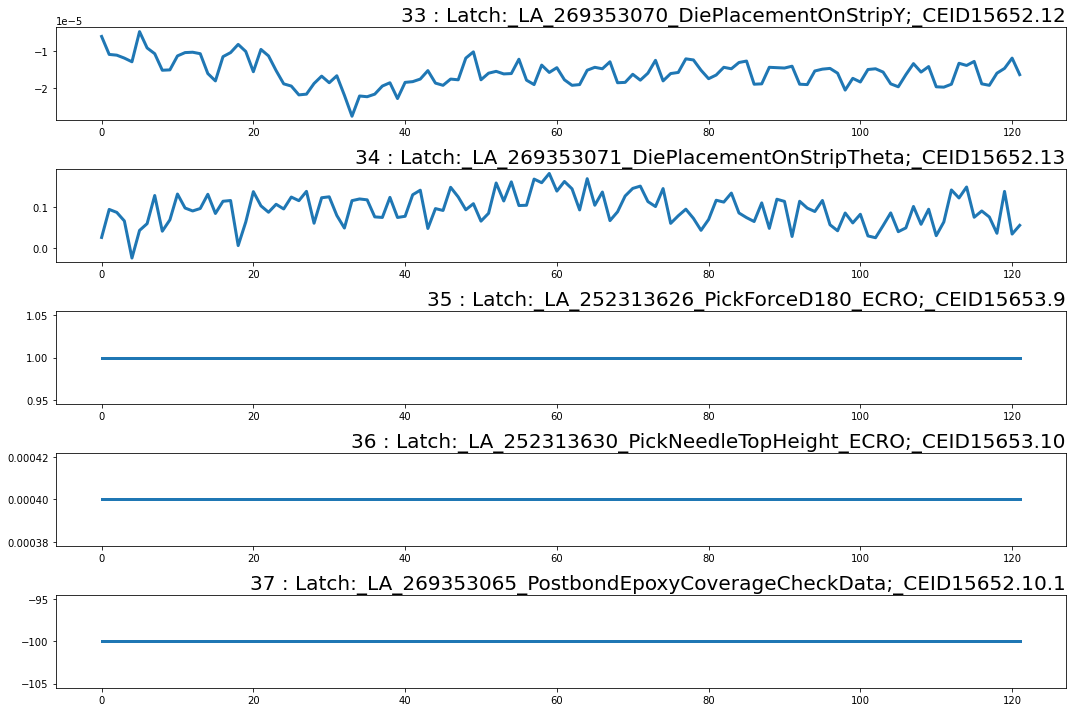

In [198]:
draw_trend(range(33,38,1))

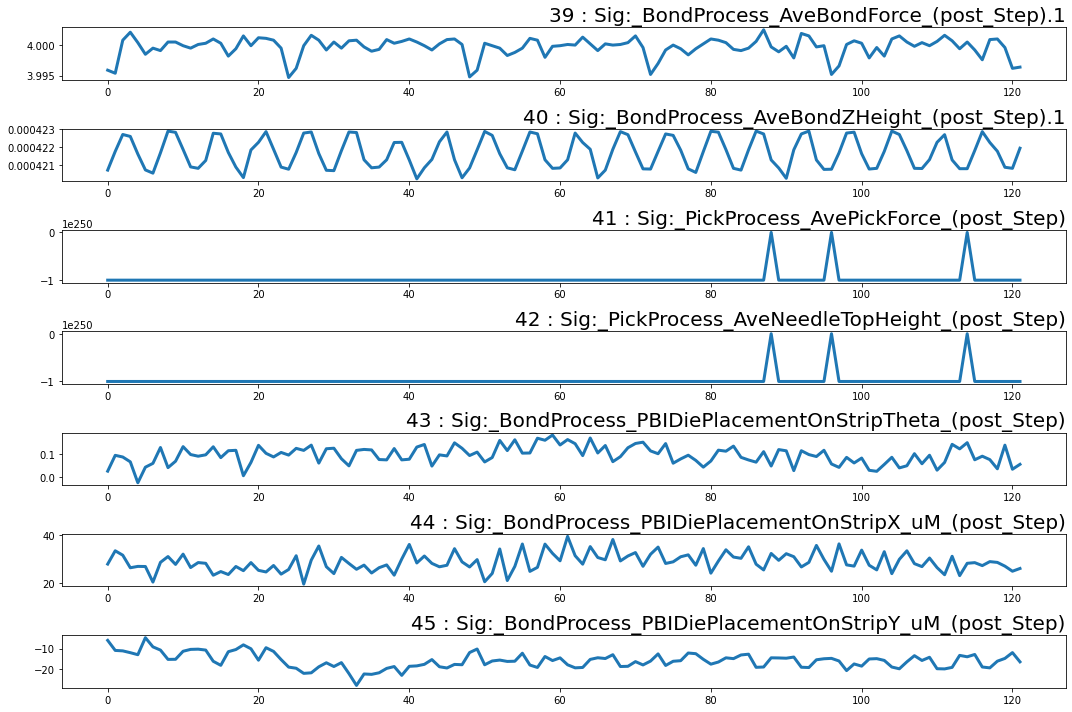

In [199]:
draw_trend(range(39,46,1))

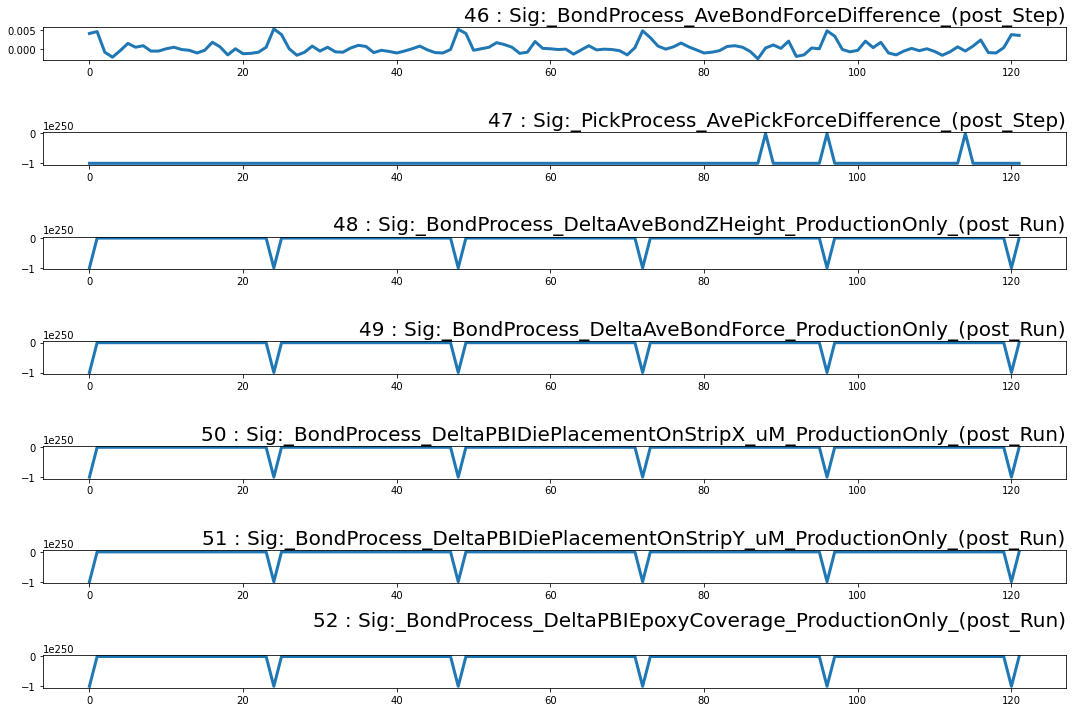

In [200]:
draw_trend(range(46,53,1))

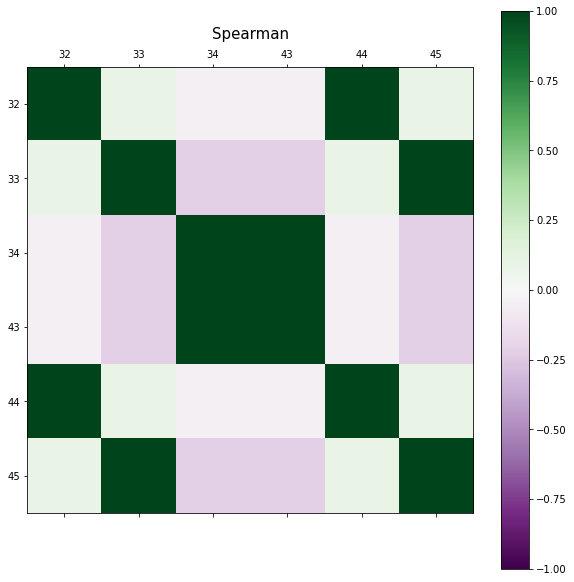

In [97]:
show_corr([32,33,34,43,44,45])

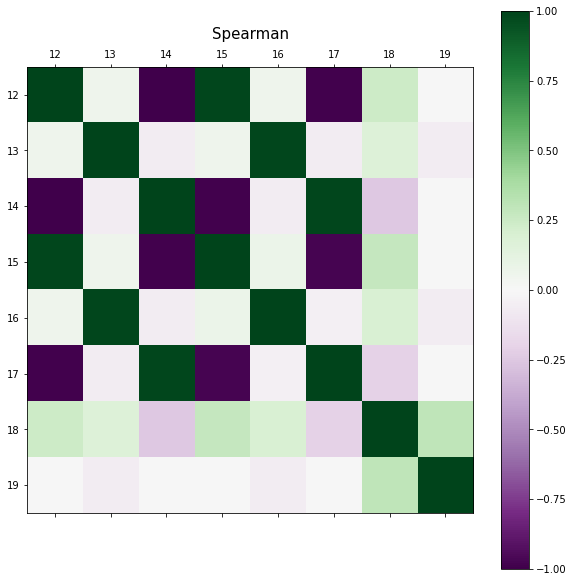

In [100]:
show_corr([12,13,14,15,16,17,18,19])

In [101]:
FDC_Data.corr()[(FDC_Data.corr() > 0.8) & (FDC_Data.corr() != 1)]

,Serial_number,Latch:_LA_269353054_DevicePositionXOnLFAtP1;_CEID15651.4,Latch:_LA_269353055_DevicePositionYOnLFAtP1;_CEID15651.5,Latch:_LA_269353094_DispenseProcessAvePress;_CEID15651.7,Latch:_LA_269353095_DispenseProcessAveZHeight;_CEID15651.8,Latch:_LA_251920580_DispenserPressure_ECRO;_CEID15651.9,Latch:_LA_269353094_DispenseProcessAvePress;_CEID15651.7.1,Latch:_LA_269353095_DispenseProcessAveZHeight;_CEID15651.8.1,Latch:_LA_251920580_DispenserPressure_ECRO;_CEID15651.9.1,Latch:_LA_251920465_DispenseHeightToStrip_ECRO;_CEID15651.10,...,Sig:_BondProcess_PBIDiePlacementOnStripTheta_(post_Step),Sig:_BondProcess_PBIDiePlacementOnStripX_uM_(post_Step),Sig:_BondProcess_PBIDiePlacementOnStripY_uM_(post_Step),Sig:_BondProcess_AveBondForceDifference_(post_Step),Sig:_PickProcess_AvePickForceDifference_(post_Step),Sig:_BondProcess_DeltaAveBondZHeight_ProductionOnly_(post_Run),Sig:_BondProcess_DeltaAveBondForce_ProductionOnly_(post_Run),Sig:_BondProcess_DeltaPBIDiePlacementOnStripX_uM_ProductionOnly_(post_Run),Sig:_BondProcess_DeltaPBIDiePlacementOnStripY_uM_ProductionOnly_(post_Run),Sig:_BondProcess_DeltaPBIEpoxyCoverage_ProductionOnly_(post_Run)\n
Serial_number,NaN,0.993019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latch:_LA_269353054_DevicePositionXOnLFAtP1;_CEID15651.4,0.993019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latch:_LA_269353055_DevicePositionYOnLFAtP1;_CEID15651.5,NaN,NaN,NaN,NaN,0.999802,NaN,NaN,0.999802,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latch:_LA_269353094_DispenseProcessAvePress;_CEID15651.7,NaN,NaN,NaN,NaN,NaN,0.99898,NaN,NaN,0.99898,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latch:_LA_269353095_DispenseProcessAveZHeight;_CEID15651.8,NaN,NaN,0.999802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latch:_LA_251920580_DispenserPressure_ECRO;_CEID15651.9,NaN,NaN,NaN,0.99898,NaN,NaN,0.99898,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latch:_LA_269353094_DispenseProcessAvePress;_CEID15651.7.1,NaN,NaN,NaN,NaN,NaN,0.99898,NaN,NaN,0.99898,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latch:_LA_269353095_DispenseProcessAveZHeight;_CEID15651.8.1,NaN,NaN,0.999802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latch:_LA_251920580_DispenserPressure_ECRO;_CEID15651.9.1,NaN,NaN,NaN,0.99898,NaN,NaN,0.99898,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latch:_LA_251920465_DispenseHeightToStrip_ECRO;_CEID15651.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
df_FDC_corr = FDC_Data.corr()[(FDC_Data.corr() > 0.8) & (FDC_Data.corr() != 1)]

In [112]:
df_FDC_corr[df_FDC_corr['Serial_number'] != 0]

,Serial_number,Latch:_LA_269353054_DevicePositionXOnLFAtP1;_CEID15651.4,Latch:_LA_269353055_DevicePositionYOnLFAtP1;_CEID15651.5,Latch:_LA_269353094_DispenseProcessAvePress;_CEID15651.7,Latch:_LA_269353095_DispenseProcessAveZHeight;_CEID15651.8,Latch:_LA_251920580_DispenserPressure_ECRO;_CEID15651.9,Latch:_LA_269353094_DispenseProcessAvePress;_CEID15651.7.1,Latch:_LA_269353095_DispenseProcessAveZHeight;_CEID15651.8.1,Latch:_LA_251920580_DispenserPressure_ECRO;_CEID15651.9.1,Latch:_LA_251920465_DispenseHeightToStrip_ECRO;_CEID15651.10,...,Sig:_BondProcess_PBIDiePlacementOnStripTheta_(post_Step),Sig:_BondProcess_PBIDiePlacementOnStripX_uM_(post_Step),Sig:_BondProcess_PBIDiePlacementOnStripY_uM_(post_Step),Sig:_BondProcess_AveBondForceDifference_(post_Step),Sig:_PickProcess_AvePickForceDifference_(post_Step),Sig:_BondProcess_DeltaAveBondZHeight_ProductionOnly_(post_Run),Sig:_BondProcess_DeltaAveBondForce_ProductionOnly_(post_Run),Sig:_BondProcess_DeltaPBIDiePlacementOnStripX_uM_ProductionOnly_(post_Run),Sig:_BondProcess_DeltaPBIDiePlacementOnStripY_uM_ProductionOnly_(post_Run),Sig:_BondProcess_DeltaPBIEpoxyCoverage_ProductionOnly_(post_Run)\n
Serial_number,NaN,0.993019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latch:_LA_269353054_DevicePositionXOnLFAtP1;_CEID15651.4,0.993019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latch:_LA_269353055_DevicePositionYOnLFAtP1;_CEID15651.5,NaN,NaN,NaN,NaN,0.999802,NaN,NaN,0.999802,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latch:_LA_269353094_DispenseProcessAvePress;_CEID15651.7,NaN,NaN,NaN,NaN,NaN,0.99898,NaN,NaN,0.99898,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latch:_LA_269353095_DispenseProcessAveZHeight;_CEID15651.8,NaN,NaN,0.999802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latch:_LA_251920580_DispenserPressure_ECRO;_CEID15651.9,NaN,NaN,NaN,0.99898,NaN,NaN,0.99898,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latch:_LA_269353094_DispenseProcessAvePress;_CEID15651.7.1,NaN,NaN,NaN,NaN,NaN,0.99898,NaN,NaN,0.99898,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latch:_LA_269353095_DispenseProcessAveZHeight;_CEID15651.8.1,NaN,NaN,0.999802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latch:_LA_251920580_DispenserPressure_ECRO;_CEID15651.9.1,NaN,NaN,NaN,0.99898,NaN,NaN,0.99898,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latch:_LA_251920465_DispenseHeightToStrip_ECRO;_CEID15651.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
df_FDC_corr = FDC_Data.corr()[(FDC_Data.corr() > 0.8) & (FDC_Data.corr() != 1)]
df_FDC_corr.isnull().sum()
for j in range(51):        
        df_FDC_corr.iloc[:,j]=df_FDC_corr.iloc[:,j].fillna(1)

In [170]:
column1 = []
column2 = []
corr = []
aa = df_FDC_corr[df_FDC_corr.loc[df_FDC_corr.columns] != 1]
aa

,Serial_number,Latch:_LA_269353054_DevicePositionXOnLFAtP1;_CEID15651.4,Latch:_LA_269353055_DevicePositionYOnLFAtP1;_CEID15651.5,Latch:_LA_269353094_DispenseProcessAvePress;_CEID15651.7,Latch:_LA_269353095_DispenseProcessAveZHeight;_CEID15651.8,Latch:_LA_251920580_DispenserPressure_ECRO;_CEID15651.9,Latch:_LA_269353094_DispenseProcessAvePress;_CEID15651.7.1,Latch:_LA_269353095_DispenseProcessAveZHeight;_CEID15651.8.1,Latch:_LA_251920580_DispenserPressure_ECRO;_CEID15651.9.1,Latch:_LA_251920465_DispenseHeightToStrip_ECRO;_CEID15651.10,...,Sig:_BondProcess_PBIDiePlacementOnStripTheta_(post_Step),Sig:_BondProcess_PBIDiePlacementOnStripX_uM_(post_Step),Sig:_BondProcess_PBIDiePlacementOnStripY_uM_(post_Step),Sig:_BondProcess_AveBondForceDifference_(post_Step),Sig:_PickProcess_AvePickForceDifference_(post_Step),Sig:_BondProcess_DeltaAveBondZHeight_ProductionOnly_(post_Run),Sig:_BondProcess_DeltaAveBondForce_ProductionOnly_(post_Run),Sig:_BondProcess_DeltaPBIDiePlacementOnStripX_uM_ProductionOnly_(post_Run),Sig:_BondProcess_DeltaPBIDiePlacementOnStripY_uM_ProductionOnly_(post_Run),Sig:_BondProcess_DeltaPBIEpoxyCoverage_ProductionOnly_(post_Run)\n
Serial_number,NaN,0.993019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latch:_LA_269353054_DevicePositionXOnLFAtP1;_CEID15651.4,0.993019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latch:_LA_269353055_DevicePositionYOnLFAtP1;_CEID15651.5,NaN,NaN,NaN,NaN,0.999802,NaN,NaN,0.999802,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latch:_LA_269353094_DispenseProcessAvePress;_CEID15651.7,NaN,NaN,NaN,NaN,NaN,0.99898,NaN,NaN,0.99898,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latch:_LA_269353095_DispenseProcessAveZHeight;_CEID15651.8,NaN,NaN,0.999802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latch:_LA_251920580_DispenserPressure_ECRO;_CEID15651.9,NaN,NaN,NaN,0.99898,NaN,NaN,0.99898,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latch:_LA_269353094_DispenseProcessAvePress;_CEID15651.7.1,NaN,NaN,NaN,NaN,NaN,0.99898,NaN,NaN,0.99898,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latch:_LA_269353095_DispenseProcessAveZHeight;_CEID15651.8.1,NaN,NaN,0.999802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latch:_LA_251920580_DispenserPressure_ECRO;_CEID15651.9.1,NaN,NaN,NaN,0.99898,NaN,NaN,0.99898,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latch:_LA_251920465_DispenseHeightToStrip_ECRO;_CEID15651.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
df_FDC_corr.columns

Index(['Serial_number',
       'Latch:_LA_269353054_DevicePositionXOnLFAtP1;_CEID15651.4',
       'Latch:_LA_269353055_DevicePositionYOnLFAtP1;_CEID15651.5',
       'Latch:_LA_269353094_DispenseProcessAvePress;_CEID15651.7',
       'Latch:_LA_269353095_DispenseProcessAveZHeight;_CEID15651.8',
       'Latch:_LA_251920580_DispenserPressure_ECRO;_CEID15651.9',
       'Latch:_LA_269353094_DispenseProcessAvePress;_CEID15651.7.1',
       'Latch:_LA_269353095_DispenseProcessAveZHeight;_CEID15651.8.1',
       'Latch:_LA_251920580_DispenserPressure_ECRO;_CEID15651.9.1',
       'Latch:_LA_251920465_DispenseHeightToStrip_ECRO;_CEID15651.10',
       'Latch:_LA_269353092_DispenseCurrentBondPosition;_CEID15651.6',
       'Sig:_DispenseProcess_AvePress_(post_Step)',
       'Sig:_DispenseProcess_AveZHeight_(post_Step)',
       'Sig:_DispenseProcess_AvePressDifference_(post_Step)',
       'Sig:_DispenseProcess_AveZHeightDifference_(post_Step)',
       'Sig:_DispenseProcess_AveZHeight_ProductionOnly_(po

In [137]:
for Col in df_FDC_corr.columns:
    print("COLUMNS : {}".format(Col))
    print("CORR : {}".format(df_FDC_corr[df_FDC_corr[Col] != 1].index))
    for Corr_index in df_FDC_corr[df_FDC_corr[Col] != 1].index:
        if Corr_index != '':
            print("CORR : {}".format(Corr_index))
    print('\n')

COLUMNS : Serial_number
CORR : Latch:_LA_269353054_DevicePositionXOnLFAtP1;_CEID15651.4
CORR : Latch:_LA_269353092_DispenseCurrentBondPosition;_CEID15651.6
CORR : Latch:_LA_269353066_DiePositionOnStripX;_CEID15652.4


COLUMNS : Latch:_LA_269353054_DevicePositionXOnLFAtP1;_CEID15651.4
CORR : Serial_number
CORR : Latch:_LA_269353092_DispenseCurrentBondPosition;_CEID15651.6


COLUMNS : Latch:_LA_269353055_DevicePositionYOnLFAtP1;_CEID15651.5
CORR : Latch:_LA_269353095_DispenseProcessAveZHeight;_CEID15651.8
CORR : Latch:_LA_269353095_DispenseProcessAveZHeight;_CEID15651.8.1
CORR : Sig:_DispenseProcess_AveZHeight_(post_Step)
CORR : Sig:_BondProcess_AveBondZHeight_(post_Step)
CORR : Latch:_LA_269353098_BondProcessAveBondZHeight;_CEID15652.7
CORR : Sig:_BondProcess_AveBondZHeight_(post_Step).1


COLUMNS : Latch:_LA_269353094_DispenseProcessAvePress;_CEID15651.7
CORR : Latch:_LA_251920580_DispenserPressure_ECRO;_CEID15651.9
CORR : Latch:_LA_251920580_DispenserPressure_ECRO;_CEID15651.9.1


COL

In [156]:
for Col in df_FDC_corr.columns:
    Corr_list = list(df_FDC_corr[df_FDC_corr[Col] != 1].index)
    if len(Corr_list) != 0:
        print("COLUMNS : {}".format(Col))
        print("CORR : {}".format(sorted(Corr_list)))
        #print(type(Corr_list[0]))
        print('\n')
       

COLUMNS : Serial_number
CORR : ['Latch:_LA_269353054_DevicePositionXOnLFAtP1;_CEID15651.4', 'Latch:_LA_269353066_DiePositionOnStripX;_CEID15652.4', 'Latch:_LA_269353092_DispenseCurrentBondPosition;_CEID15651.6']


COLUMNS : Latch:_LA_269353054_DevicePositionXOnLFAtP1;_CEID15651.4
CORR : ['Latch:_LA_269353092_DispenseCurrentBondPosition;_CEID15651.6', 'Serial_number']


COLUMNS : Latch:_LA_269353055_DevicePositionYOnLFAtP1;_CEID15651.5
CORR : ['Latch:_LA_269353095_DispenseProcessAveZHeight;_CEID15651.8', 'Latch:_LA_269353095_DispenseProcessAveZHeight;_CEID15651.8.1', 'Latch:_LA_269353098_BondProcessAveBondZHeight;_CEID15652.7', 'Sig:_BondProcess_AveBondZHeight_(post_Step)', 'Sig:_BondProcess_AveBondZHeight_(post_Step).1', 'Sig:_DispenseProcess_AveZHeight_(post_Step)']


COLUMNS : Latch:_LA_269353094_DispenseProcessAvePress;_CEID15651.7
CORR : ['Latch:_LA_251920580_DispenserPressure_ECRO;_CEID15651.9', 'Latch:_LA_251920580_DispenserPressure_ECRO;_CEID15651.9.1']


COLUMNS : Latch:_LA_269

In [141]:
test = df_FDC_corr[df_FDC_corr['Serial_number'] != 1].index


'Latch:_LA_269353054_DevicePositionXOnLFAtP1;_CEID15651.4'